# Random Walk Variants

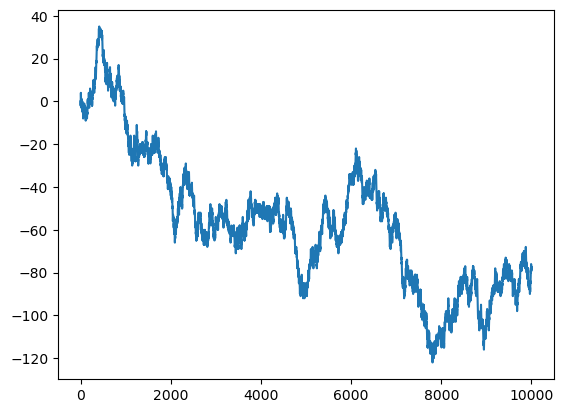

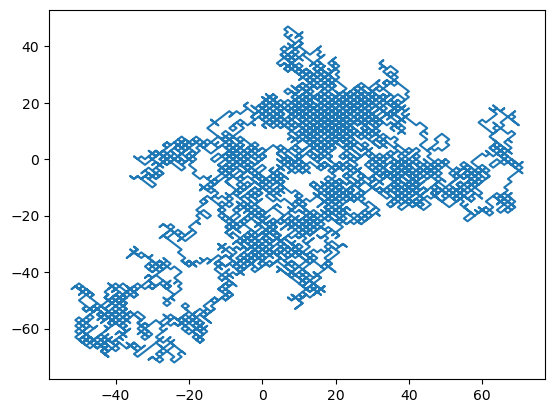

In [86]:
import numpy as np
import random
from matplotlib import pyplot as plt

def oneDRandomWalk(nSteps=100, stepSize=1):
    simulated = [0 for i in range(nSteps)]
    k = 1
    while k < nSteps:
        step_k = np.random.choice([-1,1])
        if step_k == 0:
            step_k = -1
        simulated[k] = simulated[k-1] + (step_k * stepSize)
        k += 1
    return simulated

def twoDRandomWalk(nSteps=100, stepSize=1):
    simulated = [[0,0] for i in range(nSteps)]
    k = 1
    while k < nSteps:
        step_kx, step_ky = (np.random.choice([-1,1]), np.random.choice([-1,1]))
        simulated[k][0] = simulated[k-1][0] + (step_kx * stepSize)
        simulated[k][1] = simulated[k-1][1] + (step_ky * stepSize)
        k += 1
    return simulated

n = 10000
X0 = np.arange(n)
Y0 = oneDRandomWalk(nSteps=n)
plt.plot(X0,Y0)
plt.show()

res = twoDRandomWalk(nSteps=n)
X1 = [res[i][0] for i in range(n)]X
Y1 = [res[i][1] for i in range(n)]
plt.plot(X1,Y1)
plt.show()

# Wiener Process & Brownian Motion

In [109]:
def oneDBrownianMotion(nSteps=1000, stepSize=0.1):
    Y = oneDRandomWalk(nSteps=nSteps, stepSize=np.sqrt(stepSize))
    X = [stepSize * i for i in range(nSteps)]
    return X, Y

def twoDBrownianMotion(nSteps=1000, stepSize=0.1):
    x = np.cumsum([ np.random.randn()*np.sqrt(stepSize) for i in range(nSteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(stepSize) for i in range(nSteps) ])
    return list(x), list(y)


